<a href="https://colab.research.google.com/github/fercouri/Resistencia-dos-Materiais/blob/main/resmat2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Resolução da questão 1:

In [ ]:
import math
import matplotlib.pyplot as plt

# função calcular_reacoes da resolução da questão 2 da atividade 1
def calcular_reacoes(cargas, carregamentos_distribuidos, comprimento):

      # somatório de forças pontuais
      soma_forcas_pontuais = sum(F for F, _ in cargas)
      # somatório de momentos gerados pelas forças pontuais
      soma_momentos_pontuais = sum(F * x for F, x in cargas)

      # somatório de forças e momentos gerados por carregamentos distribuídos
      soma_forcas_distribuidas = 0
      soma_momentos_distribuidos = 0
      for q, a, b in carregamentos_distribuidos:
          comprimento_carregamento = b - a
          forca_total = q * comprimento_carregamento  # Força total equivalente do carregamento
          posicao_resultante = a + comprimento_carregamento / 2  # Posição da força resultante
          soma_forcas_distribuidas += forca_total
          soma_momentos_distribuidos += forca_total * posicao_resultante

      # força total e momento total
      soma_forcas = soma_forcas_pontuais + soma_forcas_distribuidas
      soma_momentos_A = soma_momentos_pontuais + soma_momentos_distribuidos

      # reação no apoio B (RB)
      RB = soma_momentos_A / comprimento

      # reação no apoio A (RA)
      RA = soma_forcas - RB

      return RA, RB

def calcular_esforcos_internos(cargas, carregamentos_distribuidos, comprimento, RA, RB):
    x = [i * 0.1 for i in range(int(comprimento * 10) + 1)]  # Discretização da viga
    M = []
    V = []
    for i in range(len(x)):
        xi = x[i]
        momento = 0
        cortante = 0

        # contribuição das forças pontuais à esquerda
        for F, posicao in cargas:
            if posicao <= xi:
                momento += F * (xi - posicao)
                cortante += F

        # contribuição dos carregamentos distribuídos à esquerda
        for q, a, b in carregamentos_distribuidos:
            if a <= xi:
                comprimento_carregamento = min(xi, b) - a
                forca_total = q * comprimento_carregamento
                posicao_resultante = a + comprimento_carregamento / 2
                momento += forca_total * (xi - posicao_resultante)
                cortante += forca_total

        # reações de apoio
        if xi >= 0:
            momento -= RA * xi
            cortante -= RA
        if xi >= comprimento:
            momento += RB * (xi - comprimento)
            cortante += RB

        M.append(momento)
        V.append(cortante)
    return x, M, V

def gerar_diagramas(x, M, V):
    plt.figure(figsize=(10, 6))

    plt.subplot(2, 1, 1)
    plt.plot(x, M)
    plt.title("Diagrama de Momento Fletor (M(x))")
    plt.xlabel("Posição (m)")
    plt.ylabel("Momento Fletor (Nm)")
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.plot(x, V)
    plt.title("Diagrama de Força Cortante (V(x))")
    plt.xlabel("Posição (m)")
    plt.ylabel("Força Cortante (N)")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

def main():
    # código anterior para entrada de dados e cálculo de reações
    print("Cálculo das reações de apoio em uma viga biapoiada.")
    comprimento = float(input("Digite o comprimento da viga (em metros): "))

    # entrada de forças pontuais
    n_pontuais = int(input("Digite o número de forças pontuais: "))
    cargas = []
    for i in range(n_pontuais):
        print(f"\nForça pontual {i + 1}:")
        F = float(input("Digite a intensidade da carga (em N): "))
        x = float(input(f"Digite a posição da carga em relação ao apoio A (0 a {comprimento} m): "))
        cargas.append((F, x))

    # entrada de carregamentos distribuídos
    n_distribuidos = int(input("\nDigite o número de carregamentos distribuídos: "))
    carregamentos_distribuidos = []
    for i in range(n_distribuidos):
        print(f"\nCarregamento distribuído {i + 1}:")
        q = float(input("Digite a intensidade do carregamento (em N/m): "))
        a = float(input(f"Digite a posição inicial do carregamento (0 a {comprimento} m): "))
        b = float(input(f"Digite a posição final do carregamento (0 a {comprimento} m): "))
        carregamentos_distribuidos.append((q, a, b))

    # cálculo das reações
    RA, RB = calcular_reacoes(cargas, carregamentos_distribuidos, comprimento)

    # cálculo dos esforços internos
    x, M, V = calcular_esforcos_internos(cargas, carregamentos_distribuidos, comprimento, RA, RB)

    # Geração dos diagramas
    gerar_diagramas(x, M, V)

if __name__ == "__main__":
    main()

O código foi construído em duas etapas:

Cálculo das Reações de Apoio: Função calcular_reacoes da atividade anterior.
Cálculo dos Esforços Internos e Geração de Diagramas: Funções calcular_esforcos_internos e gerar_diagramas.

A função calcular_esforcos_internos calcula o momento fletor (M) e a força cortante (V) ao longo da viga. Para isso, a viga é discretizada em pequenos trechos, e os esforços internos são calculados em cada ponto. O momento Fletor (M) é calculado somando os momentos de todas as forças e carregamentos à esquerda do ponto em relação a esse ponto. A força Cortante (V) é calculada somando todas as forças e carregamentos à esquerda do ponto.

A função gerar_diagramas utiliza a biblioteca matplotlib para gerar os diagramas de momento fletor e força cortante. Os diagramas são plotados em um gráfico, com o eixo x representando a posição ao longo da viga e o eixo y representando o valor do momento fletor ou da força cortante.


O código é projetado apenas para vigas isostáticas.
Algumas limitações a serem notadas são:
- Se considera que todas as forças e carregamentos atuam no plano da viga.
- Os apoios são considerados ideais, ou seja, sem atrito e com capacidade de resistir apenas a forças verticais.
- A discretização da viga em pequenos trechos é uma aproximação do cálculo dos esforços internos. Quanto menor o tamanho dos trechos, menor o erro.

Foram testados os exercícios da lista 4 para garantir o funcionamento do código.

### Resolução da questão 2:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# código da função calcular_trelica da questão 3 da atividade 1
def calcular_trelica(nos, barras, forcas, apoios):

    num_nos = len(nos)
    num_barras = len(barras)
    num_reacoes = sum(1 if "x" in dir else 0 for _, dir in apoios.items()) + \
                  sum(1 if "y" in dir else 0 for _, dir in apoios.items())

    # verificar condições
    if num_barras + num_reacoes != 2 * num_nos:
        raise ValueError("A treliça não é isostática!")

    tamanho_sistema = 2 * num_nos
    A = np.zeros((tamanho_sistema, tamanho_sistema))
    b = np.zeros(tamanho_sistema)

    # construção da matriz de equilíbrio a partir das barras
    for i, (n1, n2) in enumerate(barras):
        x1, y1 = nos[n1]
        x2, y2 = nos[n2]

        L = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        cos = (x2 - x1) / L
        sen = (y2 - y1) / L

        # Nó inicial (n1)
        A[2 * n1][i] += cos
        A[2 * n1 + 1][i] += sen

        # Nó final (n2)
        A[2 * n2][i] -= cos
        A[2 * n2 + 1][i] -= sen

    # adicionar forças externas ao vetor b
    for no, (Fx, Fy) in forcas.items():
        b[2 * no] += Fx
        b[2 * no + 1] += Fy

    # adicionar restrições dos apoios
    reacao_idx = num_barras
    for no, direcao in apoios.items():
        if "x" in direcao:
            if reacao_idx >= tamanho_sistema:
                raise ValueError("Erro: índice de reação excedeu o tamanho do sistema.")
            A[2 * no, reacao_idx] = 1
            reacao_idx += 1
        if "y" in direcao:
            if reacao_idx >= tamanho_sistema:
                raise ValueError("Erro: índice de reação excedeu o tamanho do sistema.")
            A[2 * no + 1, reacao_idx] = 1
            reacao_idx += 1

    # verificar singularidade da matriz
    if np.linalg.matrix_rank(A) < tamanho_sistema:
        raise ValueError("A matriz de coeficientes é singular. Verifique as condições de apoio e conectividade.")

    # resolver o sistema linear
    try:
        solucao = np.linalg.solve(A, b)
    except np.linalg.LinAlgError as e:
        raise ValueError(f"Erro ao resolver o sistema linear: {e}")

    # dividir a solução em forças nas barras e reações
    forcas_barras = solucao[:num_barras]
    reacoes = solucao[num_barras:num_barras + num_reacoes]

    return forcas_barras, reacoes

def plotar_trelica_deformada(nos, barras, forcas_barras, escala=0.1):
    """
        nos (dict): Dicionário com as coordenadas dos nós.
        barras (list): Lista de tuplas com os nós de conexão das barras.
        forcas_barras (np.ndarray): Vetor com as forças nas barras.
        escala (float): Fator de escala para os deslocamentos.
    """

    num_nos = len(nos)
    deslocamentos = np.zeros((num_nos, 2))

    # cálculo dos deslocamentos nos nós
    for i, (n1, n2) in enumerate(barras):
        x1, y1 = nos[n1]
        x2, y2 = nos[n2]

        L = np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
        cos = (x2 - x1) / L
        sen = (y2 - y1) / L

        # contribuição da barra para os deslocamentos dos nós
        deslocamentos[n1] += escala * forcas_barras[i] / L * np.array([cos, sen])
        deslocamentos[n2] -= escala * forcas_barras[i] / L * np.array([cos, sen])

    # plotagem da treliça original
    for n1, n2 in barras:
        x1, y1 = nos[n1]
        x2, y2 = nos[n2]
        plt.plot([x1, x2], [y1, y2], 'b-')

    # plotagem da treliça deformada
    for n1, n2 in barras:
        x1, y1 = nos[n1] + deslocamentos[n1]
        x2, y2 = nos[n2] + deslocamentos[n2]
        plt.plot([x1, x2], [y1, y2], 'r-')

    plt.xlabel("Coordenada x")
    plt.ylabel("Coordenada y")
    plt.title("Configuração Deformada da Treliça")
    plt.grid(True)
    plt.show()

def main():
    # código anterior para entrada de dados e cálculos
    # entrada de dados dos nós
    num_nos = int(input("Digite o número de nós: "))
    nos = {}
    for i in range(num_nos):
        print(f"Nó {i}:")
        x = float(input("  Coordenada x: "))
        y = float(input("  Coordenada y: "))
        nos[i] = (x, y)

    # entrada de dados das barras
    num_barras = int(input("\nDigite o número de barras: "))
    barras = []
    for i in range(num_barras):
        print(f"Barra {i + 1}:")
        n1 = int(input("  Nó 1: "))
        n2 = int(input("  Nó 2: "))
        barras.append((n1, n2))

    # entrada de dados das forças
    num_forcas = int(input("\nDigite o número de forças aplicadas: "))
    forcas = {}
    for i in range(num_forcas):
        print(f"Força {i + 1}:")
        no = int(input("  Nó de aplicação: "))
        Fx = float(input("  Componente x (N): "))
        Fy = float(input("  Componente y (N): "))
        forcas[no] = (Fx, Fy)

    # entrada de dados dos apoios
    num_apoios = int(input("\nDigite o número de apoios: "))
    apoios = {}
    for i in range(num_apoios):
        print(f"Apoio {i + 1}:")
        no = int(input("  Nó do apoio: "))
        direcao = input("  Direção (x, y ou xy): ").strip().lower()
        apoios[no] = direcao

    # cálculo das forças
    try:
        forcas_barras, reacoes = calcular_trelica(nos, barras, forcas, apoios)

        print("\nForças nas barras:")
        for i, f in enumerate(forcas_barras):
            tipo = "Tração" if f > 0 else "Compressão"
            print(f"  Barra {i + 1}: {abs(f):.2f} N ({tipo})")

        print("\nReações nos apoios:")
        for idx, (no, direcao) in enumerate(apoios.items()):
            if "x" in direcao:
                print(f"  Nó {no}: {reacoes[idx]:.2f} N (x)")
            if "y" in direcao:
                print(f"  Nó {no}: {reacoes[idx]:.2f} N (y)")

        # Plotagem da configuração deformada
        plotar_trelica_deformada(nos, barras, forcas_barras)

    except Exception as e:
        print(f"\nErro: {e}")

if __name__ == "__main__":
    main()

O código foi construído em duas etapas:

Função calcular_trelica (atividade anterior): faz a análise estrutural da treliça, calculando as forças nas barras e as reações nos apoios. Ela verifica a isostaticidade, monta a matriz de equilíbrio (A) e o vetor de forças (b) com base nos dados de entrada e soluciona o sistema linear.

Função plotar_trelica_deformada: plota a configuração deformada da treliça. Ela calcula os deslocamentos de cada nó com base nas forças nas barras e na geometria da treliça, plota a treliça original em linhas azuis e a treliça deformada em linhas vermelhas, deslocando os nós de acordo com os deslocamentos calculados.

Limitações e Simplificações Adotadas:

- O código assume que a treliça é isostática; que o material das barras se comporta de forma linear elástica, ou seja, a força nas barras é proporcional à deformação; e que as deformações da treliça são pequenas, de modo que a geometria da treliça não se altera significativamente.
- O código considera apenas cargas estáticas, ou seja, cargas que não variam e que apoios são ideais, ou seja, não há atrito ou outras restrições além das especificadas.

Exemplos testados:
Questão 7 - lista 2:

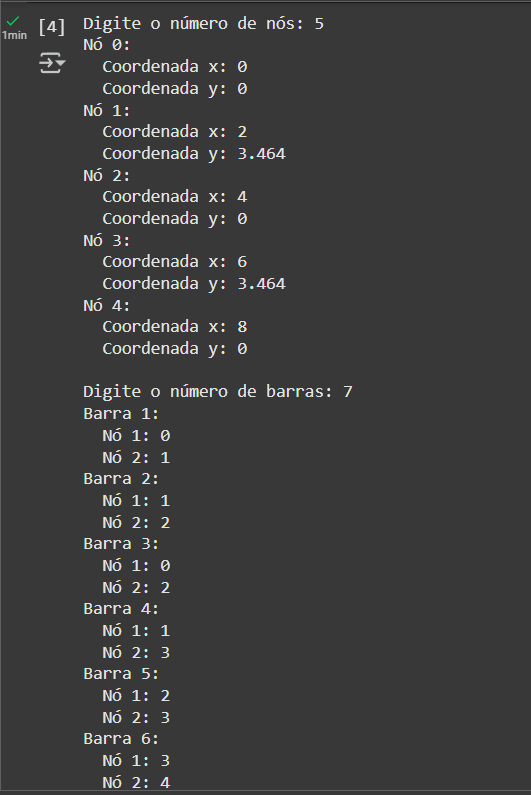

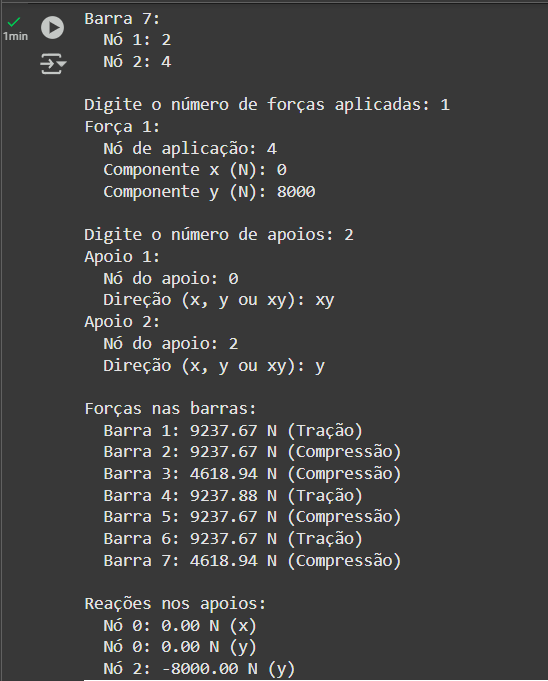

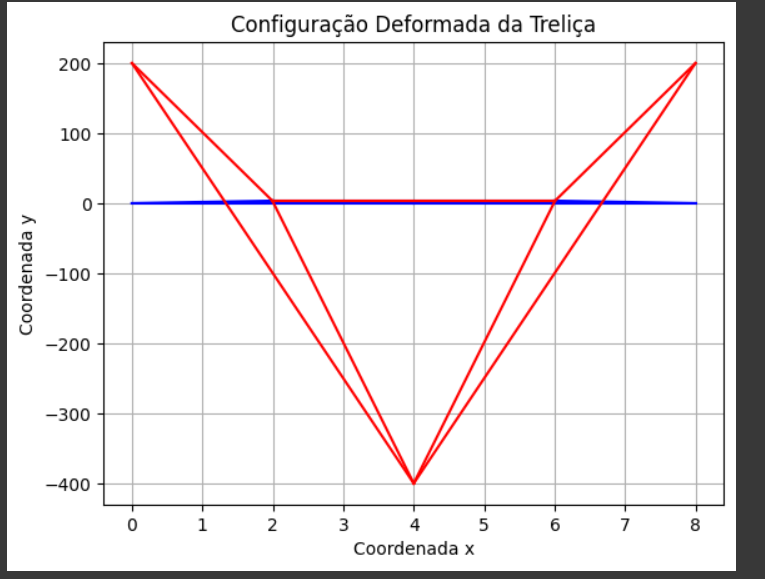

Resultado obtido condiz com gabarito da questão.